In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import get_cmap
from matplotlib.lines import Line2D
from matplotlib.patches import Patch 
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [2]:
import CBcm

In [3]:
anatoli_data_dir = '/home/jp/projects/atm_nu/plot_scripts_anatoli/'

In [4]:
import os, pickle
from copy import deepcopy

In [5]:
sys.path.append('/home/jp/projects/ipython_notebooks/MCEq/prd_paper_2021/plot_scripts_anatoli')
sys.path.append('/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules')
import mufit_config

In [6]:
# quickflux.set_mufit_spl('DDM_splines_20220406_regular.pkl')
# quickflux.set_calibration_file('prd22_results_mar8_noams.pkl')
# quickflux.set_mufit_spl('DDM_splines_20220406_vhe_200TeV.pkl')
# quickflux.set_calibration_file('prd22_results_apr19_noams_vhe2.pkl')


In [7]:
#calibration_file = '/home/jp/projects/atm_nu/ddm_results/prd22_sim_regularized_mixed.pkl'
#calibration_file = '/home/jp/projects/atm_nu/ddm_results/prd22_v15_allfree_noScale_v2.pkl'
#calibration_file = '/home/jp/projects/atm_nu/ddm_results/prd22_v16_allfree.pkl'
#calibration_file = '/home/jp/projects/atm_nu/ddm_results/prd22_qf2_v19_final.pkl'
calibration_file = '/home/jp/projects/atm_nu/ddm_results/daemon_prd_submission.pkl'

with open(calibration_file, 'rb') as data_file:
    result = pickle.load(data_file, encoding='latin1')
splines_path = os.path.join(mufit_config.jacobians_dir,
                            mufit_config.jacobians[result['flux_tables']])
calibration_file[:-4]
results_basedir = '/home/jp/projects/atm_nu/ddm_results/'
outdir = os.path.join(results_basedir, calibration_file[:-4])

In [8]:
if not os.path.isdir(outdir):
    os.mkdir(outdir)

In [9]:
print(outdir, os.path.isdir(outdir))

/home/jp/projects/atm_nu/ddm_results/daemon_prd_submission True


In [10]:
import quickflux2

In [26]:
quickflux = quickflux2.MCEq_fastflux(flux_tables='daemon-v3')

/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules/resources/daemonsplines_20230207_nousertab.pkl
Excluded params removed from known_params.
No calibration file for daemon-v3
Adjusting DEIS name


In [27]:
quickflux_def = quickflux2.MCEq_fastflux(flux_tables='ddmgsf-v7')

/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules/resources/DDM_splines_20220406_regular.pkl
Excluded params removed from known_params.
No calibration file for ddmgsf-v7
Adjusting DEIS name


In [28]:
print('Current calibration file')
print(quickflux._calibration_file)

Current calibration file
None


In [29]:
# Barr uncertianties
import pickle
bart_egrid, bart_muons = pickle.load(open(anatoli_data_dir + 'Bartol_unc_conv_neutrinos_average_GSF19_20220831.pkl','rb'))
                                          #Bartol_unc_conv_muons_GSF19.pkl', 'rb'))

In [30]:
# Reset quickflux to my stuff
quickflux.set_calibration_file(os.path.join(results_basedir, calibration_file))
print('Current calibration file')
print(quickflux._calibration_file)

Current calibration file
/home/jp/projects/atm_nu/ddm_results/daemon_prd_submission.pkl


In [31]:
print("quickflux is using", quickflux._mufit_spl_file, quickflux._calibration_file)


quickflux is using /home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules/resources/daemonsplines_20230207_nousertab.pkl /home/jp/projects/atm_nu/ddm_results/daemon_prd_submission.pkl


In [32]:
egrid = np.logspace(-1,5.99)
e_select = np.where((bart_egrid >= 0.1) & (bart_egrid < 1e6))
egrid = bart_egrid[e_select]

In [33]:
# Global plot configuration

cmp_mod_name = 'S2.3d'
ddm_name = 'DDM'
fs = 16
fs_ticks = 16
alpha_mod = .15
data_marker_config = {'lw':1, 'linestyle':'None', 'alpha':.8, 'markersize':3.}
colors = ['black', 'blue', 'orange', 'green', 'red', 'grey', 'pink']
norm = Normalize(0,10)
s_m = cm.ScalarMappable(cmap=cm.magma, norm=norm)
s_m.set_array([])
colors = [s_m.to_rgba(i) for i in range(10)]

# colors = { 'honda':'C0',
#          'bartol':'C2',
#          'ddm':'C3',
#          'sb':'C4',
#          'daemon':'red',
#          }

In [34]:
from references import L3_C, BessTeV, MINOS2007, CMS2010, MUTRON, DEIS, MUTRONRatio, OPERA2014
L3c = L3_C()
bess = BessTeV()
deis = DEIS()
mutron = MUTRON()
mutron_rat = MUTRONRatio()
minos = MINOS2007()
cms = CMS2010()
opera = OPERA2014()

## Don't Modify parameters using this dictionary

To get the error bands running with your covariance, modify quickflux.py to use your covariance matrix from the fit following how it was done for GSF.

In [35]:
# Set best fit parameters here and supply to quickflux
test_params = {}#{'GSF_1':-2., 'pi+':+1.5, 'pi-':1., 'K+':2, 'K-':2}

In [36]:
sys.path.append('/home/jp/projects/atm_nu/plot_scripts_anatoli')
from references_anatoly import SuperK2015, Honda2015, Bartol2004

superk = SuperK2015()
hkkms2015 = Honda2015(location="SouthPole")
hkkms2015_kamioka = Honda2015(location="Kamioka")
bartol2004 = Bartol2004()

from neutrino_data import *


In [37]:
# Barr uncertianties
import pickle

bart_egrid, bart_neutrinos = pickle.load(
    #open("Bartol_unc_conv_neutrinos_average_GSF19.pkl", "rb")
    open(anatoli_data_dir+'Bartol_unc_conv_neutrinos_average_GSF19_20220831.pkl','rb')
)


In [38]:
calflux_name = 'daemonflux'
ratio_ylabel = "Model / daemon"
xlow = 2
xhigh = 9e5

[0.21 0.17 0.16 0.18 0.2  0.21 0.2  0.17 0.13 0.16 0.18 0.21]


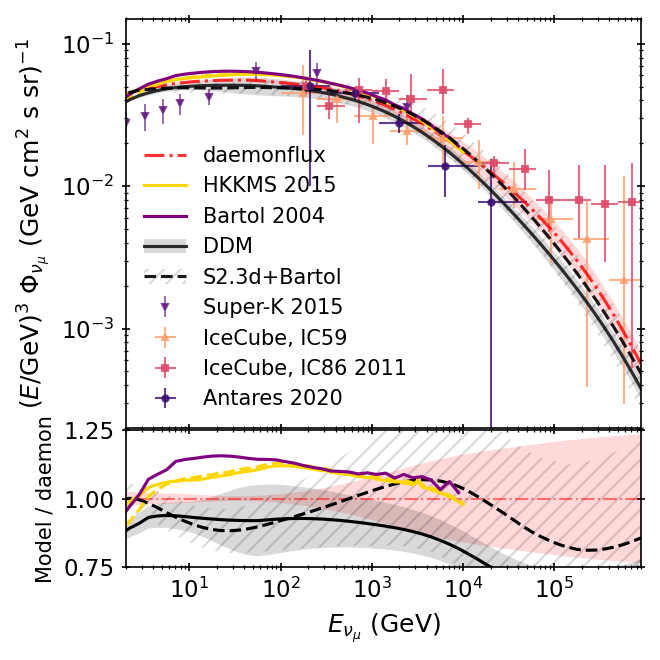

In [40]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)

gamma = 0.0

ax = axes[0]
mag = 3


# DAEMONflux
flux_cal = quickflux.get_flux_new(
    egrid, "average", "average", "numuflux", use_calibration=True
)
err_cal = quickflux.get_error_new(
    egrid, "average", "average", "numuflux", use_calibration=True
)
### Spectral index correction for tests
flux_cal = (flux_cal*egrid**gamma)

ax.fill_between(
    egrid, flux_cal + err_cal, flux_cal - err_cal, facecolor="r", alpha=alpha_mod
)
ax.plot(egrid, flux_cal, ls="-.", color="r", alpha=0.8, label=calflux_name)
### End of daemonflxu

### Honda model
l = hkkms2015.draw_spectrum(
    3, "numu" + "sum", "average", axes=ax, ls="-", color="gold", lw=1.5
)
hkkms2015_kamioka.draw_spectrum(
    3,
    "numu" + "sum",
    "average",
    axes=ax,
    ls="--",
    color="gold",
    lw=1.5,
    label="_nolabel_",
)


### Bartol model
b = bartol2004.draw_spectrum(
    3, "numu" + "sum", "average", axes=ax, ls="-", color="purple", lw=1.5
)

### SuperK data
superk.draw(
    mag=mag,
    axes=ax,
    mode="numu",
    color=colors[3],
    label="Super-K 2015",
    marker="v",
    **data_marker_config
)

# Uncalibrated model (DDM)
flux = quickflux_def.get_flux_new(egrid, "average", "average", "numuflux")
err = quickflux_def.get_error_new(egrid, "average", "average", "numuflux")

ax.fill_between(
    egrid, flux + err, flux - err, facecolor=colors[0], alpha=alpha_mod, label="DDM"
)
(lddm,) = ax.plot(egrid, flux, ls="solid", color=colors[0], alpha=0.8)




### BARTOL with s2.3d
c, e = bart_neutrinos["numu_sum"]
(lsib,) = ax.plot(
    bart_egrid,
    bart_egrid ** 3 * c,
    ls="dashed",
    color=colors[0],
    alpha=0.9,
    label="_nolabel_",
)
ax.fill_between(
    bart_egrid,
    bart_egrid ** 3 * (c - e),
    bart_egrid ** 3 * (c + e),
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)


#### All the rest is data

ic59 = IC59.get_fluxes(magnitude=3, return_dict=True)
ax.errorbar(
    ic59["E_Center"],
    ic59["Flux"],
    xerr=[ic59["E_Center"] - ic59["E_Min"], -ic59["E_Center"] + ic59["E_Max"]],
    yerr=[ic59["Flux_Min"], ic59["Flux_Max"]],
    marker="^",
    label="IceCube, IC59",
    color=colors[8],
    **data_marker_config
)


ic59 = IC86_I.get_fluxes(magnitude=3, return_dict=True)
ax.errorbar(
    ic59["E_Center"],
    ic59["Flux"],
    xerr=[ic59["E_Center"] - ic59["E_Min"], -ic59["E_Center"] + ic59["E_Max"]],
    yerr=[ic59["Flux_Min"], ic59["Flux_Max"]],
    marker="s",
    label="IceCube, IC86 2011",
    color=colors[6],
    **data_marker_config
)

ic59 = ANTARES2020numu.get_fluxes(magnitude=3, return_dict=True)
ax.errorbar(
    ic59["E_Center"],
    ic59["Flux"],
    xerr=[ic59["E_Center"] - ic59["E_Min"], -ic59["E_Center"] + ic59["E_Max"]],
    yerr=[ic59["Flux_Min"], ic59["Flux_Max"]],
    marker="o",
    label="Antares 2020",
    color=colors[2],
    **data_marker_config
)


handles, labels = ax.get_legend_handles_labels()
handles[4] = (handles[4], lsib)  # sibyll patch
handles[3] = (handles[3], lddm)  # DDM patch
l1 = ax.legend(
    handles, labels, frameon=False, loc="lower left", ncol=1, fontsize=fs - 6
)


# Setting the stuff

ax.set_ylabel(
    r"($E$/GeV)$^3~\Phi_{\nu_\mu}$ (GeV cm$^{2}$ s sr)$^{-1}$", fontsize=fs - 4
)
ax.set_xlim(xlow, xhigh)
ax.set_ylim(2e-4, 1.5e-1)
ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.xaxis.set_major_locator(plt.LogLocator(base=10, numticks=100))
ax.xaxis.set_minor_locator(
    plt.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=100)
)
ax.set_xscale("log")


##########
### RATIO FIGURE
##########

ax = axes[1]
ax.fill_between(
    egrid,
    1 + err_cal / flux_cal,
    1 - err_cal / flux_cal,
    facecolor="r",
    alpha=alpha_mod,
)

ax.fill_between(
    egrid,
    (flux + err) / flux_cal,
    (flux - err) / flux_cal,
    facecolor="k",
    alpha=alpha_mod,
)
ax.semilogx(egrid, flux / flux_cal, c="k", ls="-")


ax.semilogx(egrid, egrid ** 3 * c[e_select] / flux_cal, c="k", ls="--")
ax.fill_between(
    egrid,
    egrid ** 3 * (c[e_select] - e[e_select]) / flux_cal,
    egrid ** 3 * (c[e_select] + e[e_select]) / flux_cal,
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)

h_e_grid, h_flux, _ = hkkms2015.spectrum("average", "numu" + "sum")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "numuflux", use_calibration=True
)

## Spectral index correction for tests
ddm_h_flux *= (h_e_grid**gamma)

ax.semilogx(h_e_grid, h_e_grid ** 3 * h_flux / ddm_h_flux, c="gold", ls="-")
h_e_grid, h_flux, _ = hkkms2015_kamioka.spectrum("average", "numu" + "sum")
ax.semilogx(h_e_grid, h_e_grid ** 3 * h_flux / ddm_h_flux, c="gold", ls="--")

h_e_grid, h_flux, _ = bartol2004.spectrum("average", "numu" + "sum")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "numuflux", use_calibration=True
)
ax.semilogx(h_e_grid, h_e_grid ** 3 * h_flux / ddm_h_flux, c="purple", ls="-")

ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.set_xlabel(r"$E_{\nu_{\mu}}$ (GeV)", fontsize=fs - 4)
ax.hlines(1.0, 1e-1, 1e6, color="r", ls="-.", lw=1.0, alpha=0.5)
ax.set_ylim(0.75, 1.25)
ax.set_ylabel(ratio_ylabel)

plt.tight_layout(h_pad=-0.5)

fig.savefig(os.path.join(outdir, 'numu_e3_daemonX.pdf'))

[0.21 0.17 0.16 0.18 0.2  0.21 0.2  0.17 0.13 0.16 0.18 0.21]


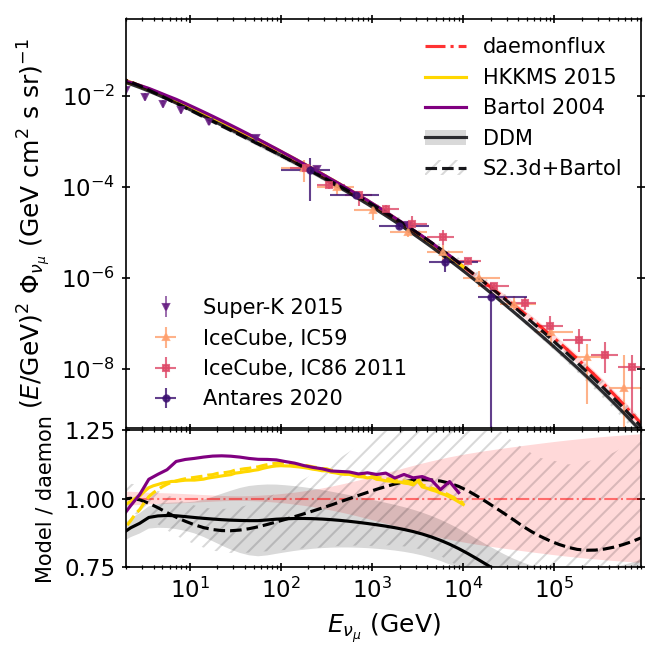

In [41]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)

ax = axes[0]
mag = 3



flux_cal = (
    quickflux.get_flux_new(
        egrid, "average", "average", "numuflux", use_calibration=True
    )
    / egrid
)
err_cal = (
    quickflux.get_error_new(
        egrid, "average", "average", "numuflux", use_calibration=True
    )
    / egrid
)

ax.fill_between(
    egrid, flux_cal + err_cal, flux_cal - err_cal, facecolor="r", alpha=alpha_mod
)
ax.plot(egrid, flux_cal, ls="-.", color="r", alpha=0.8, label=calflux_name)




l = hkkms2015.draw_spectrum(
    2, "numu" + "sum", "average", axes=ax, ls="-", color="gold", lw=1.5
)
hkkms2015_kamioka.draw_spectrum(
    2,
    "numu" + "sum",
    "average",
    axes=ax,
    ls="--",
    color="gold",
    lw=1.5,
    label="_nolabel_",
)
b = bartol2004.draw_spectrum(
    2, "numu" + "sum", "average", axes=ax, ls="-", color="purple", lw=1.5
)

superk.draw(
    mag=2,
    axes=ax,
    mode="numu",
    color=colors[3],
    label="Super-K 2015",
    marker="v",
    **data_marker_config
)
ax.set_xscale("log")
flux = quickflux_def.get_flux_new(egrid, "average", "average", "numuflux") / egrid
err = quickflux_def.get_error_new(egrid, "average", "average", "numuflux") / egrid

ax.fill_between(
    egrid, flux + err, flux - err, facecolor=colors[0], alpha=alpha_mod, label="DDM"
)
(lddm,) = ax.plot(egrid, flux, ls="solid", color=colors[0], alpha=0.8)




c, e = bart_neutrinos["numu_sum"]
(lsib,) = ax.plot(
    bart_egrid,
    bart_egrid ** 2 * c,
    ls="dashed",
    color=colors[0],
    alpha=0.9,
    label="_nolabel_",
)
ax.fill_between(
    bart_egrid,
    bart_egrid ** 2 * (c + e),
    bart_egrid ** 2 * (c - e),
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)

# ax.plot(egrid, muflux[0], ls='dashed', color=colors[0],alpha=.8, label=cmp_mod_name)

ic59 = IC59.get_fluxes(magnitude=2, return_dict=True)
ax.errorbar(
    ic59["E_Center"],
    ic59["Flux"],
    xerr=[ic59["E_Center"] - ic59["E_Min"], -ic59["E_Center"] + ic59["E_Max"]],
    yerr=[ic59["Flux_Min"], ic59["Flux_Max"]],
    marker="^",
    label="IceCube, IC59",
    color=colors[8],
    **data_marker_config
)


ic59 = IC86_I.get_fluxes(magnitude=2, return_dict=True)
ax.errorbar(
    ic59["E_Center"],
    ic59["Flux"],
    xerr=[ic59["E_Center"] - ic59["E_Min"], -ic59["E_Center"] + ic59["E_Max"]],
    yerr=[ic59["Flux_Min"], ic59["Flux_Max"]],
    marker="s",
    label="IceCube, IC86 2011",
    color=colors[6],
    **data_marker_config
)

ic59 = ANTARES2020numu.get_fluxes(magnitude=2, return_dict=True)
ax.errorbar(
    ic59["E_Center"],
    ic59["Flux"],
    xerr=[ic59["E_Center"] - ic59["E_Min"], -ic59["E_Center"] + ic59["E_Max"]],
    yerr=[ic59["Flux_Min"], ic59["Flux_Max"]],
    marker="o",
    label="Antares 2020",
    color=colors[2],
    **data_marker_config
)



handles, labels = ax.get_legend_handles_labels()
handles[4] = (handles[4], lsib)  # sibyll patch
handles[3] = (handles[3], lddm)  # DDM patch
l1 = ax.legend(
    handles[:5], labels[:5], frameon=False, loc="upper right", ncol=1, fontsize=fs - 6
)
ax.legend(
    handles[5:], labels[5:], frameon=False, loc="lower left", ncol=1, fontsize=fs - 6
)
ax.add_artist(l1)

ax.set_ylabel(
    r"($E$/GeV)$^2~\Phi_{\nu_\mu}$ (GeV cm$^{2}$ s sr)$^{-1}$", fontsize=fs - 4
)
ax.set_ylim(5e-10, 5e-1)
ax.set_xlim(xlow, xhigh)
ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.xaxis.set_major_locator(plt.LogLocator(base=10, numticks=100))
ax.xaxis.set_minor_locator(
    plt.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=100)
)


ax = axes[1]
ax.fill_between(
    egrid,
    1 + err_cal / flux_cal,
    1 - err_cal / flux_cal,
    facecolor="r",
    alpha=alpha_mod,
)

ax.fill_between(
    egrid,
    (flux + err) / flux_cal,
    (flux - err) / flux_cal,
    facecolor="k",
    alpha=alpha_mod,
)
ax.semilogx(egrid, flux / flux_cal, c="k", ls="-")


ax.semilogx(egrid, egrid ** 2 * c[e_select] / flux_cal, c="k", ls="--")
ax.fill_between(
    egrid,
    egrid ** 2 * (c[e_select] - e[e_select]) / flux_cal,
    egrid ** 2 * (c[e_select] + e[e_select]) / flux_cal,
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)

h_e_grid, h_flux, _ = hkkms2015.spectrum("average", "numu" + "sum")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "numuflux", use_calibration=True
)
ax.semilogx(h_e_grid, h_e_grid ** 3 * h_flux / ddm_h_flux, c="gold", ls="-")
h_e_grid, h_flux, _ = hkkms2015_kamioka.spectrum("average", "numu" + "sum")
ax.semilogx(h_e_grid, h_e_grid ** 3 * h_flux / ddm_h_flux, c="gold", ls="--")

h_e_grid, h_flux, _ = bartol2004.spectrum("average", "numu" + "sum")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "numuflux", use_calibration=True
)
ax.semilogx(h_e_grid, h_e_grid ** 3 * h_flux / ddm_h_flux, c="purple", ls="-")

ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.set_xlabel(r"$E_{\nu_{\mu}}$ (GeV)", fontsize=fs - 4)
ax.hlines(1.0, 1e-1, 1e6, color="r", ls="-.", lw=1.0, alpha=0.5)
ax.set_ylim(0.75, 1.25)
ax.set_ylabel(ratio_ylabel)

plt.tight_layout(h_pad=-0.5)
fig.savefig(os.path.join(outdir, 'numu_e2_daemon5.pdf'))

['daemonflux', 'HKKMS 2015', 'Bartol 2004', 'DDM', 'S2.3d+Bartol', 'Super-K 2015', 'IceCube 2015', 'Antares 2020']


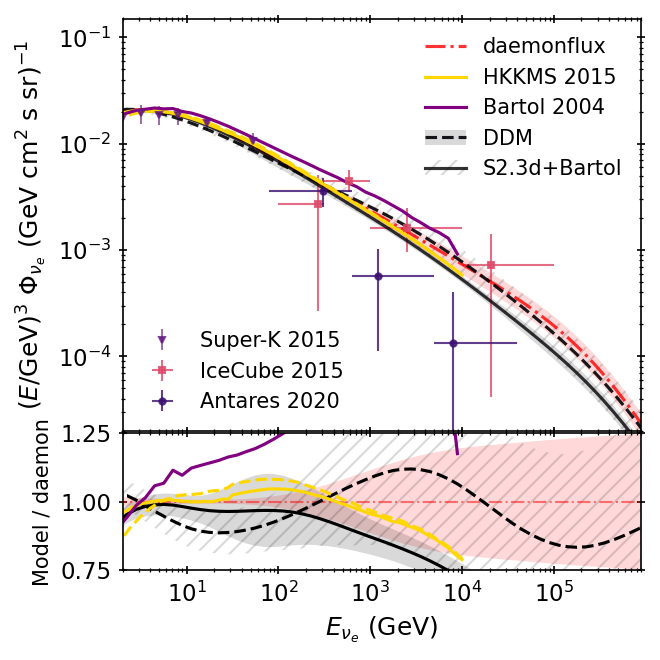

In [42]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)

ax = axes[0]


flux_cal = quickflux.get_flux_new(
    egrid, "average", "average", "nueflux", use_calibration=True
)
err_cal = quickflux.get_error_new(
    egrid, "average", "average", "nueflux", use_calibration=True
)

ax.fill_between(
    egrid, flux_cal + err_cal, flux_cal - err_cal, facecolor="r", alpha=alpha_mod
)
#ax.plot(egrid, flux_cal, ls="-.", color="r", alpha=0.8)
ax.plot(egrid, flux_cal, ls="-.", color="r", alpha=0.8, label=calflux_name)




# ax.legend(frameon=False, loc='lower center', fontsize=fs-6)
flux = quickflux_def.get_flux_new(egrid, "average", "average", "nueflux")
err = quickflux_def.get_error_new(egrid, "average", "average", "nueflux")

ax.fill_between(
    egrid, flux + err, flux - err, facecolor=colors[0], alpha=alpha_mod, label="DDM"
)
(lddm,) = ax.plot(egrid, flux, ls="solid", color=colors[0], alpha=0.8)


c, e = bart_neutrinos["nue_sum"]
(lsib,) = ax.plot(
    bart_egrid,
    bart_egrid ** 3 * c,
    ls="dashed",
    color=colors[0],
    alpha=0.9,
    label="_nolabel_",
)
ax.fill_between(
    bart_egrid,
    bart_egrid ** 3 * (c - e),
    bart_egrid ** 3 * (c + e),
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)

# ax.plot(egrid, nue[0], ls='dashed', color=colors[0],alpha=0.8, label=cmp_mod_name)
l = hkkms2015.draw_spectrum(
    3, "nue" + "sum", "average", axes=ax, ls="-", color="gold", lw=1.5
)
hkkms2015_kamioka.draw_spectrum(
    3,
    "nue" + "sum",
    "average",
    axes=ax,
    ls="--",
    color="gold",
    lw=1.5,
    label="_nolabel_",
)
b = bartol2004.draw_spectrum(
    3, "nue" + "sum", "average", axes=ax, ls="-", color="purple", lw=1.5
)



superk.draw(
    mag=mag,
    axes=ax,
    mode="nue",
    color=colors[3],
    marker="v",
    label="Super-K 2015",
    **data_marker_config
)

icnue = IC86_nue.get_fluxes(magnitude=3, return_dict=True)

ax.errorbar(
    icnue["E_Center"],
    icnue["Flux"],
    xerr=[icnue["E_Center"] - icnue["E_Min"], -icnue["E_Center"] + icnue["E_Max"]],
    yerr=[icnue["Flux_Min"], icnue["Flux_Max"]],
    marker="s",
    label="IceCube 2015",
    color=colors[6],
    **data_marker_config
)

ic59 = ANTARES2020nue.get_fluxes(magnitude=3, return_dict=True)
ax.errorbar(
    ic59["E_Center"],
    ic59["Flux"],
    xerr=[ic59["E_Center"] - ic59["E_Min"], -ic59["E_Center"] + ic59["E_Max"]],
    yerr=[ic59["Flux_Min"], ic59["Flux_Max"]],
    marker="o",
    label="Antares 2020",
    color=colors[2],
    **data_marker_config
)

ax.set_xlim(xlow, xhigh)
ax.set_ylim(2e-5, 1.5e-1)

handles, labels = ax.get_legend_handles_labels()
print(labels)
handles[3] = (handles[3], lsib)  # sibyll patch
handles[4] = (handles[4], lddm)  # DDM patch
# sort both labels and handles by labels
#labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
# ax.legend(handles, labels)

# ax.legend(
#     handles, #[handles[li] for li in [-2, -1, 0, 2, 1]],
#     labels, #[labels[li] for li in [-2, -1, 0, 2, 1]],
#     frameon=False,
#     loc="best",
#     ncol=1,
#     fontsize=fs - 6,
# )

l1 = ax.legend(
    handles[:5], labels[:5], frameon=False, loc="upper right", ncol=1, fontsize=fs - 6
)
ax.legend(
    handles[5:], labels[5:], frameon=False, loc="lower left", ncol=1, fontsize=fs - 6
)
ax.add_artist(l1)


ax.set_ylabel(r"($E$/GeV)$^3~\Phi_{\nu_e}$ (GeV cm$^{2}$ s sr)$^{-1}$", fontsize=fs - 4)
ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.xaxis.set_major_locator(plt.LogLocator(base=10, numticks=100))
ax.xaxis.set_minor_locator(
    plt.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=100)
)


ax = axes[1]
ax.fill_between(
    egrid,
    1 + err_cal / flux_cal,
    1 - err_cal / flux_cal,
    facecolor="r",
    alpha=alpha_mod,
)

ax.fill_between(
    egrid,
    (flux + err) / flux_cal,
    (flux - err) / flux_cal,
    facecolor="k",
    alpha=alpha_mod,
)
ax.semilogx(egrid, flux / flux_cal, c="k", ls="-")


ax.semilogx(egrid, egrid ** 3 * c[e_select] / flux_cal, c="k", ls="--")
ax.fill_between(
    egrid,
    egrid ** 3 * (c[e_select] - e[e_select]) / flux_cal,
    egrid ** 3 * (c[e_select] + e[e_select]) / flux_cal,
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)

h_e_grid, h_flux, _ = hkkms2015.spectrum("average", "nue" + "sum")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "nueflux", use_calibration=True
)
ax.semilogx(h_e_grid, h_e_grid ** 3 * h_flux / ddm_h_flux, c="gold", ls="-")
h_e_grid, h_flux, _ = hkkms2015_kamioka.spectrum("average", "nue" + "sum")
ax.semilogx(h_e_grid, h_e_grid ** 3 * h_flux / ddm_h_flux, c="gold", ls="--")

h_e_grid, h_flux, _ = bartol2004.spectrum("average", "nue" + "sum")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "nueflux", use_calibration=True
)
ax.semilogx(h_e_grid, h_e_grid ** 3 * h_flux / ddm_h_flux, c="purple", ls="-")

ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.set_xlabel(r"$E_{\nu_{\mu}}$ (GeV)", fontsize=fs - 4)
ax.hlines(1.0, 1e-1, 1e6, color="r", ls="-.", lw=1.0, alpha=0.5)
ax.set_ylim(0.75, 1.25)
ax.set_ylabel(ratio_ylabel)
ax.set_xlabel(r"$E_{\nu_{e}}$ (GeV)", fontsize=fs - 4)

plt.tight_layout(h_pad=-0.5)
fig.savefig(os.path.join(outdir, 'nue_e3_daemon5.pdf'))

['daemonflux', 'HKKMS 2015', 'Bartol 2004', 'DDM', 'S2.3d+Bartol', 'Super-K 2015', 'IceCube 2015', 'Antares 2020']


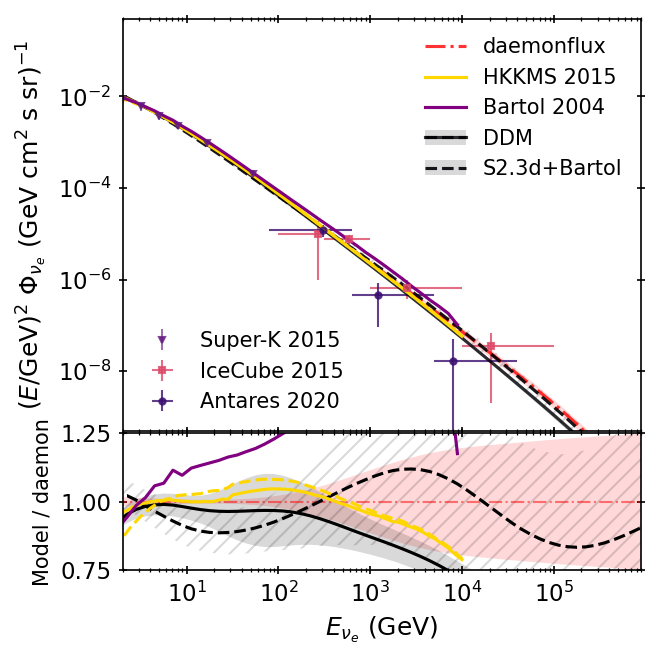

In [43]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)

ax = axes[0]

flux_cal = (
    quickflux.get_flux_new(egrid, "average", "average", "nueflux", use_calibration=True)
    / egrid
)
err_cal = (
    quickflux.get_error_new(
        egrid, "average", "average", "nueflux", use_calibration=True
    )
    / egrid
)

ax.fill_between(
    egrid, flux_cal + err_cal, flux_cal - err_cal, facecolor="r", alpha=alpha_mod
)
ax.plot(egrid, flux_cal, ls="-.", color="r", alpha=0.8, label=calflux_name)


superk.draw(
    mag=2,
    axes=ax,
    mode="nue",
    color=colors[3],
    marker="v",
    label="Super-K 2015",
    **data_marker_config
)

icnue = IC86_nue.get_fluxes(magnitude=2, return_dict=True)

ax.errorbar(
    icnue["E_Center"],
    icnue["Flux"],
    xerr=[icnue["E_Center"] - icnue["E_Min"], -icnue["E_Center"] + icnue["E_Max"]],
    yerr=[icnue["Flux_Min"], icnue["Flux_Max"]],
    marker="s",
    label="IceCube 2015",
    color=colors[6],
    **data_marker_config
)

ic59 = ANTARES2020nue.get_fluxes(magnitude=2, return_dict=True)
ax.errorbar(
    ic59["E_Center"],
    ic59["Flux"],
    xerr=[ic59["E_Center"] - ic59["E_Min"], -ic59["E_Center"] + ic59["E_Max"]],
    yerr=[ic59["Flux_Min"], ic59["Flux_Max"]],
    marker="o",
    label="Antares 2020",
    color=colors[2],
    **data_marker_config
)
ax.legend(frameon=False, loc="lower center", fontsize=fs - 6)

flux = quickflux_def.get_flux_new(egrid, "average", "average", "nueflux") / egrid
err = quickflux_def.get_error_new(egrid, "average", "average", "nueflux") / egrid

ax.fill_between(
    egrid, flux + err, flux - err, facecolor=colors[0], alpha=alpha_mod, label="DDM"
)
(lddm,) = ax.plot(egrid, flux, ls="solid", color=colors[0], alpha=0.8)


c, e = bart_neutrinos["nue_sum"]
(lsib,) = ax.plot(
    bart_egrid,
    bart_egrid ** 2 * c,
    ls="dashed",
    color=colors[0],
    alpha=0.9,
    label="_nolabel_",
)
ax.fill_between(
    bart_egrid,
    bart_egrid ** 2 * (c + e),
    bart_egrid ** 2 * (c - e),
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)

# ax.plot(egrid, nue[0], ls='dashed', color=colors[0],alpha=0.8, label=cmp_mod_name)
l = hkkms2015.draw_spectrum(
    2, "nue" + "sum", "average", axes=ax, ls="-", color="gold", lw=1.5
)
hkkms2015_kamioka.draw_spectrum(
    2,
    "nue" + "sum",
    "average",
    axes=ax,
    ls="--",
    color="gold",
    lw=1.5,
    label="_nolabel_",
)
b = bartol2004.draw_spectrum(
    2, "nue" + "sum", "average", axes=ax, ls="-", color="purple", lw=1.5
)


ax.set_ylim(5e-10, 5e-1)
ax.set_xlim(xlow, xhigh)
print(labels)
handles, labels = ax.get_legend_handles_labels()
handles[4] = (handles[3], lsib)  # sibyll patch
handles[3] = (handles[4], lddm)  # DDM patch
l1 = ax.legend(
    handles[:5], labels[:5], frameon=False, loc="upper right", ncol=1, fontsize=fs - 6
)
ax.legend(
    handles[5:], labels[5:], frameon=False, loc="lower left", ncol=1, fontsize=fs - 6
)
ax.add_artist(l1)


ax.set_ylabel(r"($E$/GeV)$^2~\Phi_{\nu_e}$ (GeV cm$^{2}$ s sr)$^{-1}$", fontsize=fs - 4)
ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.xaxis.set_major_locator(plt.LogLocator(base=10, numticks=100))
ax.xaxis.set_minor_locator(
    plt.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=100)
)


ax = axes[1]
ax.fill_between(
    egrid,
    1 + err_cal / flux_cal,
    1 - err_cal / flux_cal,
    facecolor="r",
    alpha=alpha_mod,
)

ax.fill_between(
    egrid,
    (flux + err) / flux_cal,
    (flux - err) / flux_cal,
    facecolor="k",
    alpha=alpha_mod,
)
ax.semilogx(egrid, flux / flux_cal, c="k", ls="-")


ax.semilogx(egrid, egrid ** 2 * c[e_select] / flux_cal, c="k", ls="--")
ax.fill_between(
    egrid,
    egrid ** 2 * (c[e_select] - e[e_select]) / flux_cal,
    egrid ** 2 * (c[e_select] + e[e_select]) / flux_cal,
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)

h_e_grid, h_flux, _ = hkkms2015.spectrum("average", "nue" + "sum")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "nueflux", use_calibration=True
)
ax.semilogx(h_e_grid, h_e_grid ** 3 * h_flux / ddm_h_flux, c="gold", ls="-")
h_e_grid, h_flux, _ = hkkms2015_kamioka.spectrum("average", "nue" + "sum")
ax.semilogx(h_e_grid, h_e_grid ** 3 * h_flux / ddm_h_flux, c="gold", ls="--")

h_e_grid, h_flux, _ = bartol2004.spectrum("average", "nue" + "sum")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "nueflux", use_calibration=True
)
ax.semilogx(h_e_grid, h_e_grid ** 3 * h_flux / ddm_h_flux, c="purple", ls="-")

ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.set_xlabel(r"$E_{\nu_{\mu}}$ (GeV)", fontsize=fs - 4)
ax.hlines(1.0, 1e-1, 1e6, color="r", ls="-.", lw=1.0, alpha=0.5)
ax.set_ylim(0.75, 1.25)
ax.set_ylabel(ratio_ylabel)
ax.set_xlabel(r"$E_{\nu_{e}}$ (GeV)", fontsize=fs - 4)

plt.tight_layout(h_pad=-0.5)
fig.savefig(os.path.join(outdir, 'nue_e2_daemon5.pdf'))

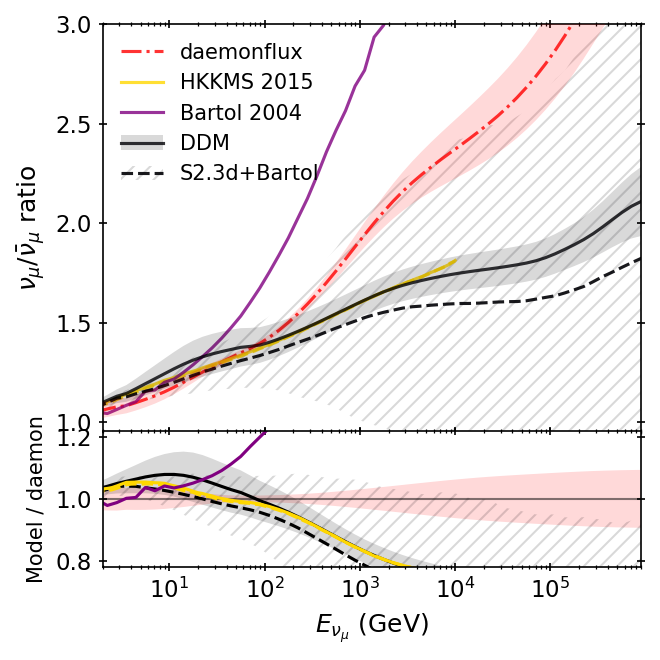

In [44]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)

ax = axes[0]

# add data
flux_cal = quickflux.get_flux_new(
    egrid, "average", "average", "numuratio", use_calibration=True
)
err_cal = quickflux.get_error_new(
    egrid, "average", "average", "numuratio", use_calibration=True
)

ax.fill_between(
    egrid,
    flux_cal + err_cal,
    flux_cal - err_cal,
    facecolor="r",
    alpha=alpha_mod,
    zorder=7,
)

ax.plot(egrid, flux_cal, ls="-.", color="r", alpha=0.8, label=calflux_name)


hkkms2015.draw_spectrum(
    mag=0,
    axes=ax,
    flavor="numuratio",
    cos_theta="average",
    color="gold",
    alpha=0.8,
    marker="None",
    ls="solid",
)
hkkms2015_kamioka.draw_spectrum(
    mag=0,
    axes=ax,
    flavor="numuratio",
    cos_theta="average",
    color="gold",
    alpha=0.8,
    marker="None",
    ls="--",
    label=None,
)
bartol2004.draw_spectrum(
    mag=0,
    axes=ax,
    flavor="numuratio",
    cos_theta="average",
    color="purple",
    alpha=0.8,
    marker="None",
    ls="solid",
)


ax.set_xscale("log")


# ax.set_xlabel(r'$E_{\nu_{\mu}}$ [GeV]', fontsize=fs)
ax.set_ylabel(r"$ \Phi_{\nu_{l}} /\Phi_{\bar{\nu}_l} $ ", fontsize=fs)

# add data
flux = quickflux_def.get_flux_new(
    egrid, "average", "average", "numuratio", params=test_params
)
err = quickflux_def.get_error_new(egrid, "average", "average", "numuratio")

ax.fill_between(
    egrid,
    flux + err,
    flux - err,
    facecolor=colors[0],
    alpha=alpha_mod,
    label="DDM",
    zorder=7,
)

(lddm,) = ax.plot(egrid, flux, ls="solid", color=colors[0], alpha=0.8)



c, e = bart_neutrinos["numu_ratio"]
(lsib,) = ax.plot(
    bart_egrid, c, ls="dashed", color=colors[0], alpha=0.9, label="_nolabel_"
)
ax.fill_between(
    bart_egrid,
    (c - e),
    (c + e),
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
    zorder=0,
)

# ax.plot(egrid, muflux[0], ls='dashed', color=colors[0],alpha=0.8, label=cmp_mod_name)

ax.set_xlim(xlow, xhigh)
ax.set_ylim(0.95, 3)

handles, labels = ax.get_legend_handles_labels()
handles[4] = (handles[4], lsib)  # sibyll patch
handles[3] = (handles[3], lddm)  # DDM patch
l1 = ax.legend(
    handles, labels, frameon=False, loc="upper left", ncol=1, fontsize=fs - 6
)


ax.set_ylabel(r"$\nu_\mu/\bar{\nu}_\mu$ ratio", fontsize=fs - 4)
ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.xaxis.set_major_locator(plt.LogLocator(base=10, numticks=100))
ax.xaxis.set_minor_locator(
    plt.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=100)
)


ax = axes[1]
ax.fill_between(
    egrid,
    1 + err_cal / flux_cal,
    1 - err_cal / flux_cal,
    facecolor="r",
    alpha=alpha_mod,
)

ax.fill_between(
    egrid,
    (flux + err) / flux_cal,
    (flux - err) / flux_cal,
    facecolor="k",
    alpha=alpha_mod,
)
ax.semilogx(egrid, flux / flux_cal, c="k", ls="-")

ax.semilogx(egrid, c[e_select] / flux_cal, c="k", ls="--")
ax.fill_between(
    egrid,
    (c[e_select] - e[e_select]) / flux_cal,
    (c[e_select] + e[e_select]) / flux_cal,
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)

h_e_grid, h_flux, _ = hkkms2015.spectrum("average", "numuratio")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "numuratio", use_calibration=True
)
ax.semilogx(h_e_grid, h_flux / ddm_h_flux, c="gold", ls="-")
h_e_grid, h_flux, _ = hkkms2015_kamioka.spectrum("average", "numuratio")
ax.semilogx(h_e_grid, h_flux / ddm_h_flux, c="gold", ls="--")

h_e_grid, h_flux, _ = bartol2004.spectrum("average", "numuratio")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "numuratio", use_calibration=True
)
ax.semilogx(h_e_grid, h_flux / ddm_h_flux, c="purple", ls="-")

ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.set_xlabel(r"$E_{\nu_{\mu}}$ (GeV)", fontsize=fs - 4)
ax.hlines(1.0, 1e-1, 1e6, color="k", lw=1.0, alpha=0.5)
ax.set_ylim(0.78, 1.22)
ax.set_ylabel(ratio_ylabel)
ax.set_xlabel(r"$E_{\nu_{\mu}}$ (GeV)", fontsize=fs - 4)

plt.tight_layout(h_pad=-0.5)
fig.savefig(os.path.join(outdir, 'numu_ratio_daemon5.pdf'))

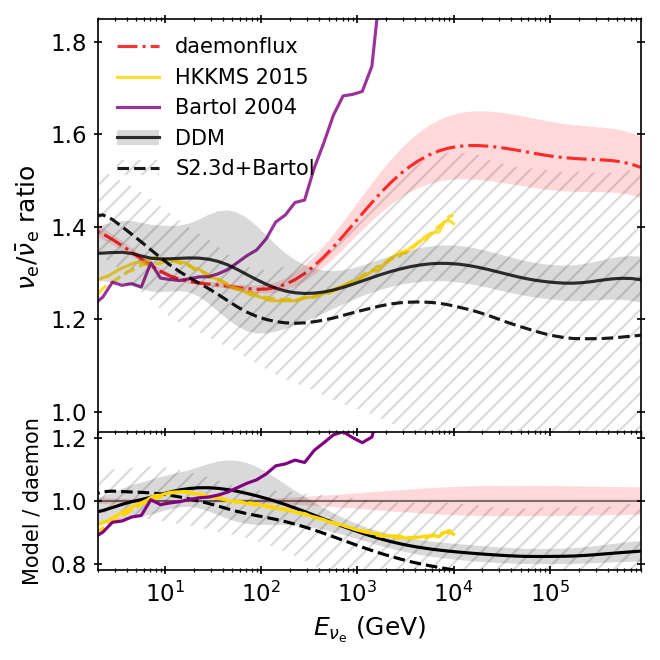

In [45]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)
ax = axes[0]


# add data
flux_cal = quickflux.get_flux_new(
    egrid, "average", "average", "nueratio", use_calibration=True
)
err_cal = quickflux.get_error_new(
    egrid, "average", "average", "nueratio", use_calibration=True
)

ax.fill_between(
    egrid,
    flux_cal + err_cal,
    flux_cal - err_cal,
    facecolor="r",
    alpha=alpha_mod,
    zorder=7,
)

ax.plot(egrid, flux_cal, ls="-.", color="r", alpha=0.8, label=calflux_name)


hkkms2015.draw_spectrum(
    mag=0,
    axes=ax,
    flavor="nueratio",
    cos_theta="average",
    color="gold",
    alpha=0.8,
    marker="None",
    ls="solid",
)
hkkms2015_kamioka.draw_spectrum(
    mag=0,
    axes=ax,
    flavor="nueratio",
    cos_theta="average",
    color="gold",
    alpha=0.8,
    marker="None",
    ls="--",
    label='_nolabel_'
)
bartol2004.draw_spectrum(
    mag=0,
    axes=ax,
    flavor="nueratio",
    cos_theta="average",
    color="purple",
    alpha=0.8,
    marker="None",
    ls="solid",
)


ax.set_xscale("log")


# add data
flux = quickflux_def.get_flux_new(
    egrid, "average", "average", "nueratio", params=test_params
)
err = quickflux_def.get_error_new(egrid, "average", "average", "nueratio")

ax.fill_between(
    egrid,
    flux + err,
    flux - err,
    facecolor=colors[0],
    alpha=alpha_mod,
    label="DDM",
    zorder=7,
)

(lddm,) = ax.plot(egrid, flux, ls="solid", color=colors[0], alpha=0.8)


c, e = bart_neutrinos["nue_ratio"]
(lsib,) = ax.plot(
    bart_egrid, c, ls="dashed", color=colors[0], alpha=0.9, label="_nolabel_"
)
ax.fill_between(
    bart_egrid,
    (c - e),
    (c + e),
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)

# ax.plot(egrid, nue[0], ls='dashed', color=colors[0],alpha=0.8, label=cmp_mod_name)

ax.set_xlim(xlow, xhigh)
ax.set_ylim(0.95, 1.85)

handles, labels = ax.get_legend_handles_labels()
handles[4] = (handles[4], lsib)  # sibyll patch
handles[3] = (handles[3], lddm)  # DDM patch
l1 = ax.legend(
    handles, labels, frameon=False, loc="upper left", ncol=1, fontsize=fs - 6
)


ax.set_ylabel(r"$\nu_{\rm e}/\bar{\nu}_{\rm e}$ ratio", fontsize=fs - 4)
ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.xaxis.set_major_locator(plt.LogLocator(base=10, numticks=100))
ax.xaxis.set_minor_locator(
    plt.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=100)
)


ax = axes[1]
ax.fill_between(
    egrid,
    1 + err_cal / flux_cal,
    1 - err_cal / flux_cal,
    facecolor="r",
    alpha=alpha_mod,
)

ax.fill_between(
    egrid,
    (flux + err) / flux_cal,
    (flux - err) / flux_cal,
    facecolor="k",
    alpha=alpha_mod,
)
ax.semilogx(egrid, flux / flux_cal, c="k", ls="-")

ax.semilogx(egrid, c[e_select] / flux_cal, c="k", ls="--")
ax.fill_between(
    egrid,
    (c[e_select] - e[e_select]) / flux_cal,
    (c[e_select] + e[e_select]) / flux_cal,
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)

h_e_grid, h_flux, _ = hkkms2015.spectrum("average", "nueratio")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "nueratio", use_calibration=True
)
ax.semilogx(h_e_grid, h_flux / ddm_h_flux, c="gold", ls="-")
h_e_grid, h_flux, _ = hkkms2015_kamioka.spectrum("average", "nueratio")
ax.semilogx(h_e_grid, h_flux / ddm_h_flux, c="gold", ls="--")

h_e_grid, h_flux, _ = bartol2004.spectrum("average", "nueratio")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "nueratio", use_calibration=True
)
ax.semilogx(h_e_grid, h_flux / ddm_h_flux, c="purple", ls="-")

ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.set_xlabel(r"$E_{\nu_{\rm e}}$ (GeV)", fontsize=fs - 4)
ax.hlines(1.0, 1e-1, 1e6, color="k", lw=1.0, alpha=0.5)
ax.set_ylim(0.78, 1.22)
ax.set_ylabel(ratio_ylabel)

plt.tight_layout(h_pad=-0.5)
fig.savefig(os.path.join(outdir, 'nue_ratio_daemon5.pdf'))

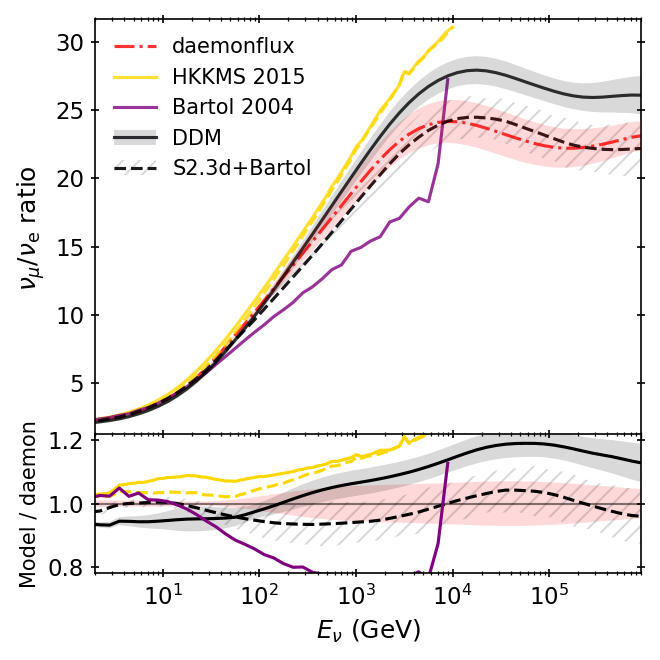

In [46]:
fig, axes = plt.subplots(
    2, 1, figsize=(4.5, 4.5), sharex=True, gridspec_kw={"height_ratios": (3, 1)}
)
ax = axes[0]


# add data
flux_cal = quickflux.get_flux_new(
    egrid, "average", "average", "flavorratio", use_calibration=True
)
err_cal = quickflux.get_error_new(
    egrid, "average", "average", "flavorratio", use_calibration=True
)

ax.fill_between(
    egrid,
    flux_cal + err_cal,
    flux_cal - err_cal,
    facecolor="r",
    alpha=alpha_mod,
    zorder=7,
)

ax.plot(egrid, flux_cal, ls="-.", color="r", alpha=0.8, label=calflux_name)

hkkms2015.draw_spectrum(
    mag=0,
    axes=ax,
    flavor="flavorratio",
    cos_theta="average",
    color="gold",
    alpha=0.8,
    marker="None",
    ls="solid",
)
hkkms2015_kamioka.draw_spectrum(
    mag=0,
    axes=ax,
    flavor="flavorratio",
    cos_theta="average",
    color="gold",
    alpha=0.8,
    marker="None",
    ls="--",
    label=None,
)
bartol2004.draw_spectrum(
    mag=0,
    axes=ax,
    flavor="flavorratio",
    cos_theta="average",
    color="purple",
    alpha=0.8,
    marker="None",
    ls="solid",
)


ax.set_xscale("log")

# add data
flux = quickflux_def.get_flux_new(
    egrid, "average", "average", "flavorratio", params=test_params
)
err = quickflux_def.get_error_new(egrid, "average", "average", "flavorratio")

ax.fill_between(
    egrid,
    flux + err,
    flux - err,
    facecolor=colors[0],
    alpha=alpha_mod,
    label="DDM",
    zorder=7,
)

(lddm,) = ax.plot(egrid, flux, ls="solid", color=colors[0], alpha=0.8)


c, e = bart_neutrinos["numunue_ratio"]
(lsib,) = ax.plot(
    bart_egrid, c, ls="dashed", color=colors[0], alpha=0.9, label="_nolabel_"
)
ax.fill_between(
    bart_egrid,
    (c - e),
    (c + e),
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)
# ax.plot(egrid, muflux[0]/nue[0], ls='dashed', color=colors[0],alpha=0.8, label=cmp_mod_name)

ax.set_xlim(xlow, xhigh)
ax.set_ylim(1.05, 31.7)

handles, labels = ax.get_legend_handles_labels()
handles[4] = (handles[4], lsib)  # sibyll patch
handles[3] = (handles[3], lddm)  # DDM patch
l1 = ax.legend(
    handles, labels, frameon=False, loc="upper left", ncol=1, fontsize=fs - 6
)


ax.set_ylabel(r"$\nu_{\mu}/\nu_{\rm e}$ ratio", fontsize=fs - 4)
ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)


ax = axes[1]
ax.fill_between(
    egrid,
    1 + err_cal / flux_cal,
    1 - err_cal / flux_cal,
    facecolor="r",
    alpha=alpha_mod,
)

ax.fill_between(
    egrid,
    (flux + err) / flux_cal,
    (flux - err) / flux_cal,
    facecolor="k",
    alpha=alpha_mod,
)
ax.semilogx(egrid, flux / flux_cal, c="k", ls="-")

ax.semilogx(egrid, c[e_select] / flux_cal, c="k", ls="--")
ax.fill_between(
    egrid,
    (c[e_select] - e[e_select]) / flux_cal,
    (c[e_select] + e[e_select]) / flux_cal,
    hatch="///",
    facecolor="none",
    lw=0.0,
    edgecolor=colors[0],
    alpha=alpha_mod,
    label=cmp_mod_name + "+Bartol",
)

h_e_grid, h_flux, _ = hkkms2015.spectrum("average", "flavorratio")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "flavorratio", use_calibration=True
)
ax.semilogx(h_e_grid, h_flux / ddm_h_flux, c="gold", ls="-")
h_e_grid, h_flux, _ = hkkms2015_kamioka.spectrum("average", "flavorratio")
ax.semilogx(h_e_grid, h_flux / ddm_h_flux, c="gold", ls="--")

h_e_grid, h_flux, _ = bartol2004.spectrum("average", "flavorratio")
ddm_h_flux = quickflux.get_flux_new(
    h_e_grid, "average", "average", "flavorratio", use_calibration=True
)
ax.semilogx(h_e_grid, h_flux / ddm_h_flux, c="purple", ls="-")

ax.tick_params(
    axis="both",
    which="both",
    right=True,
    top=True,
    direction="inout",
    labelsize=fs_ticks - 5,
)
ax.set_xlabel(r"$E_{\nu}$ (GeV)", fontsize=fs - 4)
ax.hlines(1.0, 1e-1, 1e6, color="k", lw=1.0, alpha=0.5)
ax.set_ylim(0.78, 1.22)
ax.set_ylabel(ratio_ylabel)

plt.tight_layout(h_pad=-0.5)
fig.savefig(os.path.join(outdir, 'flavor_ratio_daemon5.pdf'))